# Exploring EDF Data

## European Data Format (EDF)

> EDF European Data Format
European Data Format (EDF) is a standard file format designed for exchange and storage of medical time series. Being an open and non-proprietary format, EDF(+) is commonly used to archive, exchange and analyse data from commercial devices in a format that is independent of the acquisition system.

- https://www.edfplus.info
- https://pyedflib.readthedocs.io/en/latest/
  - https://github.com/holgern/pyedflib/
  - https://pypi.org/project/pyEDFlib/
- https://stackoverflow.com/questions/51869713/how-to-read-edf-data-in-python-3
- https://mne.tools/stable/generated/mne.io.read_raw_edf.html
- https://github.com/cleemesser/python-edf

## Open File and Inspect Summary Info

In [1]:
import pyedflib

In [2]:
file_path = "/Users/michael/DataFiles/Time-series/EDF/test.edf"

In [3]:
edf = pyedflib.EdfReader(file_path)

In [4]:
type(edf)

pyedflib.edfreader.EdfReader

In [5]:
edf.getHeader()

{'technician': 'Mr. Spotty',
 'recording_additional': 'unit test file',
 'patientname': 'Hans Muller',
 'patient_additional': 'patient',
 'patientcode': 'abcxyz99',
 'equipment': 'test generator',
 'admincode': 'Dr. X',
 'gender': 'Male',
 'startdate': datetime.datetime(2011, 4, 4, 12, 57, 2),
 'birthdate': '30 jun 1969'}

In [6]:
edf.file_info()

file name: /Users/michael/DataFiles/Time-series/EDF/test.edf
signals in file: 11


In [7]:
edf.file_info_long()

file name: /Users/michael/DataFiles/Time-series/EDF/test.edf
signals in file: 11
label: squarewave fs: 200 nsamples 120000
label: ramp fs: 200 nsamples 120000
label: pulse fs: 200 nsamples 120000
label: noise fs: 200 nsamples 120000
label: sine 1 Hz fs: 200 nsamples 120000
label: sine 8 Hz fs: 200 nsamples 120000
label: sine 8.1777 Hz fs: 200 nsamples 120000
label: sine 8.5 Hz fs: 200 nsamples 120000
label: sine 15 Hz fs: 200 nsamples 120000
label: sine 17 Hz fs: 200 nsamples 120000
label: sine 50 Hz fs: 200 nsamples 120000


In [8]:
edf.getSignalLabels()

['squarewave',
 'ramp',
 'pulse',
 'noise',
 'sine 1 Hz',
 'sine 8 Hz',
 'sine 8.1777 Hz',
 'sine 8.5 Hz',
 'sine 15 Hz',
 'sine 17 Hz',
 'sine 50 Hz']

In [9]:
print(edf.getStartdatetime())

2011-04-04 12:57:02


In [10]:
edf.getFileDuration()

600

In [11]:
edf.getSampleFrequencies()

array([200, 200, 200, 200, 200, 200, 200, 200, 200, 200, 200])

In [12]:
edf.getNSamples()

array([120000, 120000, 120000, 120000, 120000, 120000, 120000, 120000,
       120000, 120000, 120000])

## Look at one of the signals

In [103]:
channel = 0

In [104]:
signal = edf.readSignal(channel)

In [105]:
signal

array([ 99.99237049,  99.99237049,  99.99237049, ..., -99.96185245,
       -99.96185245, -99.96185245])

In [106]:
len(signal)

120000

In [107]:
edf.getSignalHeader(channel)

{'label': 'squarewave',
 'dimension': 'uV',
 'sample_rate': 200.0,
 'sample_frequency': 200.0,
 'physical_max': 1000.0,
 'physical_min': -1000.0,
 'digital_max': 32767,
 'digital_min': -32768,
 'prefilter': 'pre1',
 'transducer': 'trans1'}

In [108]:
edf.getSampleFrequencies()[channel]

200

In [109]:
import matplotlib.pyplot as plt

In [110]:
%matplotlib inline

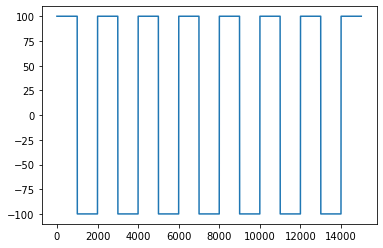

In [121]:
portion = 8
plt.plot(signal[0:int(len(signals[0])/portion)])

## Dealing with Time

In [37]:
import datetime

The EDF file will tell us the date and time that the collection started.

In [30]:
edf.getStartdatetime()

datetime.datetime(2011, 4, 4, 12, 57, 2)

And the EDF file will tell us the sampling frequency of each channel -- this is the number of time-series observations per second. We could rightfully assume that the values are observed at a uniform temporal distance from each other.

In [63]:
edf.getSampleFrequencies()[channel]

200

The plot above of this channel shows a square wave. The value oscilates from approximately +100 to approximately -100 every 1000 samples. For this signal, the approximateed amount of time between oscillations is computed as:

In [32]:
1000/200

5.0

The waveform oscilates every five seconds.

The total duration captured in this EDF file is `edf.getFileDuration()` seconds:

In [113]:
edf.getFileDuration()

600

The EDF file contains 600 seconds (10 minutes) of data.

Next we can determine the absolute start and end time for this file:

In [114]:
start_time = edf.getStartdatetime()

In [115]:
delta_time = datetime.timedelta(seconds = edf.getFileDuration())

In [116]:
end_time = start_time + delta_time

In [117]:
print(f"The EDF file contains data from {start_time} to {end_time}")

The EDF file contains data from 2011-04-04 12:57:02 to 2011-04-04 13:07:02


## Close file

In [ ]:
edf.close()